In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
admission=pd.read_csv('C:/Users/welcome/Excel Documents/Admission_Predict.csv')

In [3]:
admission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


In [4]:
admission['Research']=admission['Research'].astype(object)

In [5]:
df_target=admission['Chance of Admit']

In [6]:
df_feature=admission.drop(columns='Chance of Admit')

In [7]:
df_num=df_feature.select_dtypes(include=np.number)

In [8]:
df_cat=df_feature.select_dtypes(include=object)

In [9]:
df_num.columns,df_cat.columns

(Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
        'LOR', 'CGPA'],
       dtype='object'),
 Index(['Research'], dtype='object'))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_num, df_target, random_state = 10, test_size = 0.2)

# Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

# Multinominal NB

In [13]:
nb_1=MultinomialNB()

In [14]:
nb_1.fit(X_train,y_train)

MultinomialNB()

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score,roc_curve

In [16]:
confusion_matrix(y_test,nb_1.predict(X_test))

array([[31, 11],
       [17, 21]], dtype=int64)

In [17]:
accuracy_score(y_test,nb_1.predict(X_test))

0.65

In [18]:
recall_score(y_test,nb_1.predict(X_test))

0.5526315789473685

In [19]:
precision_score(y_test,nb_1.predict(X_test))

0.65625

In [20]:
y_pred_proba=nb_1.predict_proba(X_test)

In [21]:
y_pred_proba

array([[0.31614628, 0.68385372],
       [0.59032022, 0.40967978],
       [0.33964242, 0.66035758],
       [0.66914899, 0.33085101],
       [0.88703384, 0.11296616],
       [0.4800967 , 0.5199033 ],
       [0.58195389, 0.41804611],
       [0.3160335 , 0.6839665 ],
       [0.48323432, 0.51676568],
       [0.55529297, 0.44470703],
       [0.60804289, 0.39195711],
       [0.40553473, 0.59446527],
       [0.29385164, 0.70614836],
       [0.75892561, 0.24107439],
       [0.72526908, 0.27473092],
       [0.14906523, 0.85093477],
       [0.86940334, 0.13059666],
       [0.74280936, 0.25719064],
       [0.71485514, 0.28514486],
       [0.15074167, 0.84925833],
       [0.63894581, 0.36105419],
       [0.64689666, 0.35310334],
       [0.19435052, 0.80564948],
       [0.28413679, 0.71586321],
       [0.21435057, 0.78564943],
       [0.779136  , 0.220864  ],
       [0.72979465, 0.27020535],
       [0.28789604, 0.71210396],
       [0.43300629, 0.56699371],
       [0.16742414, 0.83257586],
       [0.

In [22]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba[:,1])

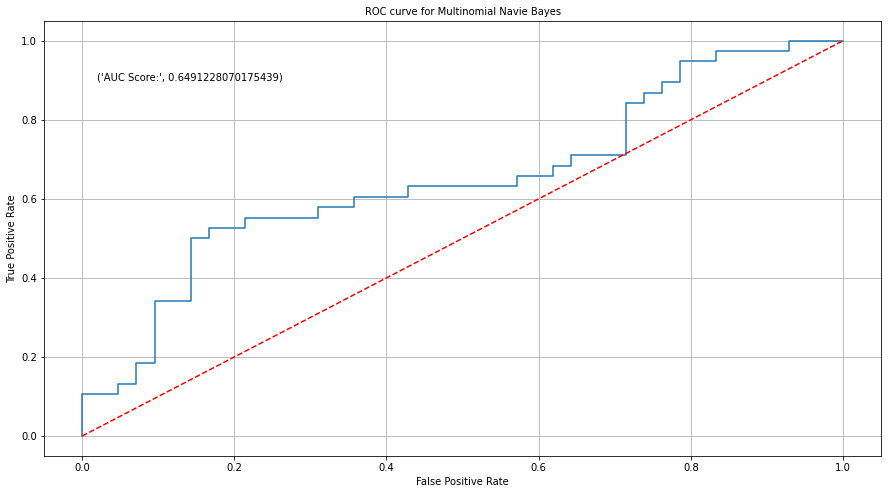

In [23]:
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Multinomial Navie Bayes',fontsize=10)
plt.xlabel('False Positive Rate',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=10)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1])))
plt.grid(True)

# Bernoulli NB

In [24]:
nb_2=BernoulliNB()

In [26]:
nb_2.fit(X_train,y_train)

BernoulliNB()

In [27]:
y_predict=nb_2.predict(X_test)

In [28]:
y_pred_proba=nb_2.predict_proba(X_test)

In [29]:
confusion_matrix(y_test,y_predict)

array([[42,  0],
       [38,  0]], dtype=int64)

In [30]:
accuracy_score(y_test,y_predict)

0.525

In [32]:
recall_score(y_test,y_predict)

0.0

In [33]:
precision_score(y_test,y_predict)

C:\Users\welcome\anaconda3\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [35]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba[:,1])

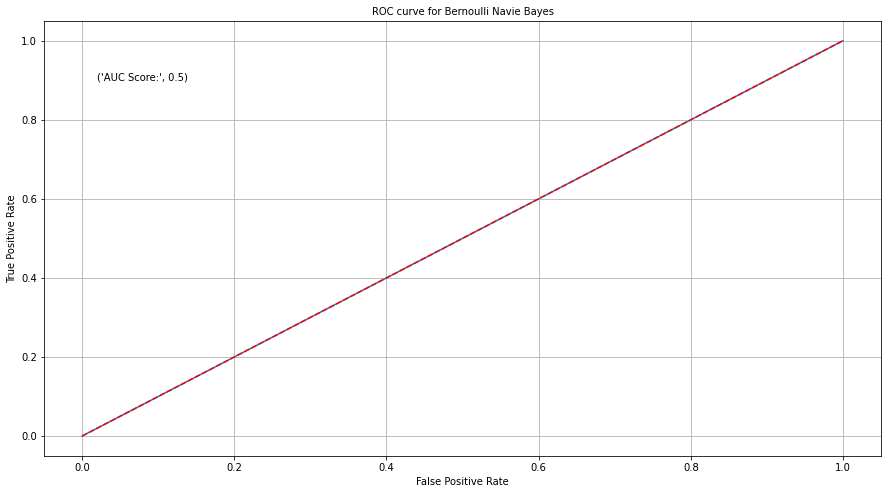

In [36]:
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Bernoulli Navie Bayes',fontsize=10)
plt.xlabel('False Positive Rate',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=10)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1])))
plt.grid(True)

# Gaussian NB

In [37]:
nb_3=GaussianNB()

In [38]:
nb_3.fit(X_train,y_train)

GaussianNB()

In [39]:
y_predict=nb_3.predict(X_test)

In [40]:
y_pred_proba=nb_3.predict_proba(X_test)

In [41]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba[:,1])

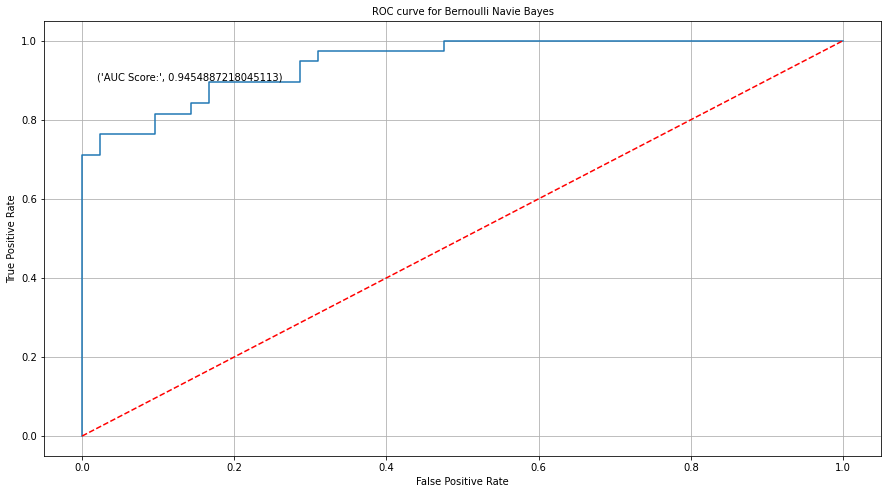

In [42]:
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Bernoulli Navie Bayes',fontsize=10)
plt.xlabel('False Positive Rate',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=10)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1])))
plt.grid(True)

In [43]:
# Using Navie Bayes for admission process
# guassian navie bayes is helpful and there is a chance of admission,Area under the curve is having 94% compare
# to Bernoulli navie bayes and multinomial navie bayes